In [142]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse

# Bifurcacion Saddle-Node en el plano y separacion de escalas temporales

Volvemos al sistema minimal con no linealidad cuadrática:

$\dot{x} = a-y$

$\dot{y} = x^2-y$

Donde se puede ver que lo que sucede a medida que $a$ se aproxima a cero por los positivos es que los dos puntos fijos (un punto silla y un atractor) se van acercando y para $a=0$ colapsan y se produce una bifurcacion de nodo-silla en el plano. 

El cambio del flujo debido a la bifurcacion es analogo a lo que observabamos en 1D, ya que la bifurcacion se produce a lo largo de una curva y en la direccion perpendicular a la curva el flujo es atractor. Esto se ve mas claro si le agregamos un parametro $b$ que permita amplificar la disipacion (obviamente positivo).

$\dot{x} = a-y$

$\dot{y} = x^2-by$

Cuando $b$ es muy grande como se puede probar en las celdas que siguen el flujo converge muy rapidamente a la nulclina de $\dot{y}=0$ y una vez sobre esa curva se mueve mas lentamente hacia el nodo atractor. Es decir que en este caso la dimension adicional entra como una variable rapida (un transitorio), pero la dinamica interesante sucede a lo largo de la curva (parabola) y sobre esa curva se produce la bifurcacion (explorarlo en el grafico interactivo debajo). 


In [2]:
function nodosilla2d!(du,u,p,t)
    (a,b) = p
    du[1] = a-u[2]
    du[2] = u[1]*u[1]-b*u[2]
    du
end    

nodosilla2d! (generic function with 1 method)

In [4]:
@manipulate throttle=0.5 for xini=-1:0.01:1, yini=-1:0.1:1,a=0.0:0.01:0.2,b=1.0:0.1:5.0
    flux2d_nullclines(nodosilla2d!,[xini;yini],30.0,[a,b];title="Nodo Silla")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f379460, Task (runnable) @0x000000000f379460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",

Esta separación de escalas de tiempo, la misma que veíamos en los osciladores de relajación es muy importante ya que:
- muchos sistemas naturales (y artificiales) presentan esta separación de escalas de tiempo, cada dinámica tiene su propio tiempo característico
- nos permite separar el análisis del problema no lineal en dos etapas; una primera etapa donde el sistema relaja siguiendo una dirección de evolución rápida y podemos considerar a las otras direcciones lentas como parámetros, seguida de una evolución lenta sobre alguna variedad (en 2D una curva) donde en general ocurre la dinámica interesante
- las bifurcaciones ocurren siempre sobre las variedades "lentas", esto esta vinculado con el Critical Slowing Down, siempre cerca de una bifuracion la dinamica se enlentece, basicamente porque en las otras direcciones transversales a la variedad el flujo converge (o diverge) exponencialmente, pero sobre la variedad se mueve enlentecido por la proximidad de una bifurcación
- cuando se estudian sistemas de más dimensiones nos va a interesar lo que ocurre sobre las variedades lentas (o centrales)  y vamos a colapsar la dinámica a una evolución con menos grados de libertad (por lo general uno o dos) sobre esas variedades, proceso que se conoce como **reducción a la variedad central**

Si bien puede parecer al principio muy abstracto el concepto, se ver en la evolucion de multiples trayectorias de abajo para un valor grandes de $b$ que la dinámica rápida colapsa a un entorno de la nulclina parabolica y luego sobre esa region evoluciona como un sistema 1D en un entorno de una bifurcacion nodo silla.

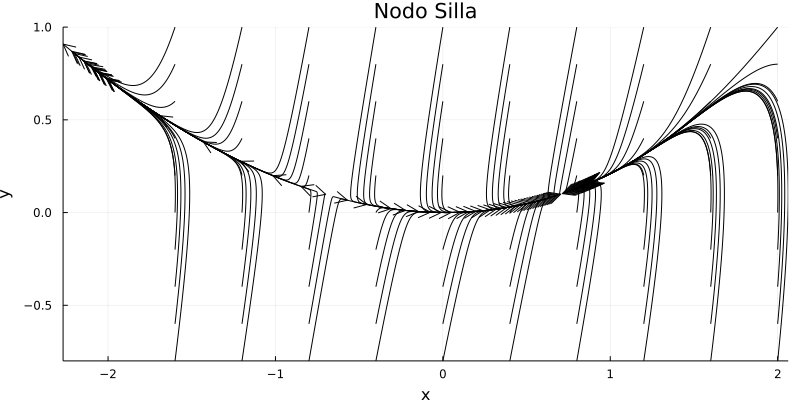

In [5]:
a = 0.1; b = 5.0
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
condition(u,t,integrator) = (u[1]*u[1]+u[2]*u[2]) > 4.5
affect!(integrator) = terminate!(integrator)
u0_arr=[[-2+i*0.4;-1+j*0.2] for i=1:10 for j=1:10]
prob = ODEProblem(nodosilla2d!, u0_arr[1], (5.0),[a,b])
sol = solve(EnsembleProblem(prob,prob_func=prob_func),callback=DiscreteCallback(condition,affect!),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(1,2),arrows=true;
    legend=false,xlabel="x",ylabel="y",c=:black,size=(800,400),title="Nodo Silla",fmt=:png)

Vamos a hacer un cambio de coordenadas que pone de evidencia que este sistema tiende a la bifurcacion SN sobre una recta  cuando $b$ es grande. 

$w = \displaystyle\frac{y-a}{b}-x$

$z = \displaystyle\frac{x}{\sqrt{b}}$

con la transformacion inversa:

$x= \sqrt{b}z$

$y=bw+b\sqrt{b}z+a$

El nuevo sistema queda escrito 

$\dot{w}=\displaystyle\frac{\dot{y}}{b} - \dot{x} = \displaystyle\frac{x^2-by}{b}+y-a = \displaystyle\frac{x^2}{b}-a = z^2-a$

$\dot{z}=\displaystyle\frac{\dot{x}}{\sqrt{b}} = \displaystyle\frac{1}{\sqrt{b}}(a-y) = \displaystyle\frac{1}{\sqrt{b}}(a-bw-b\sqrt{b}z-a) = -\sqrt{b}w-bz$

Como es un cambio lineal de coordenadas el sistema sigue teniendo dos puntos fijos para $a>0$ con la misma estabilidad. El punto fijo estable está en:

$w_* = \mp \sqrt{ab}$

$z_* = \pm \sqrt{a}$

El cambio lineal de coordenadas nos garantiza que el retrato de fases es topologicamente equivalente, pero la forma del flujo puede cambiar porque es un sistema no lineal y de hecho este cambio lo que hace es "rectificar" la parabola y ahora la nulclina de la segunda variable es la recta $z=-w/\sqrt{b}$ como puede verse en el diagrama de abajo

In [6]:
function nodosilla2da!(du,u,p,t)
    (a,b) = p
    du[1] = u[2]*u[2]-a
    du[2] = -sqrt(b)*u[1]-b*u[2]
    du
end    

nodosilla2da! (generic function with 1 method)

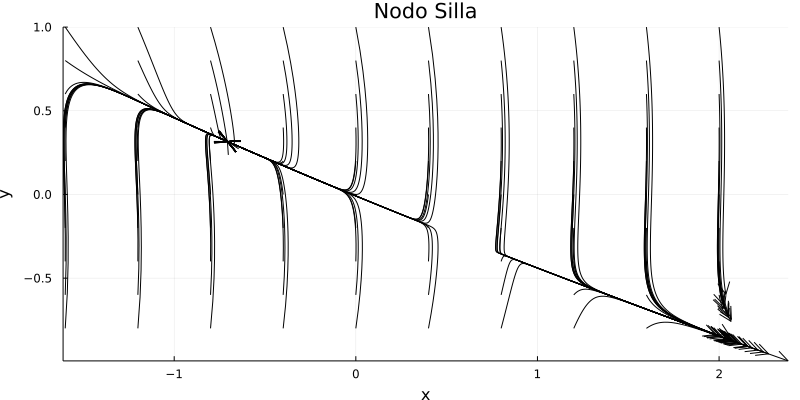

In [7]:
prob = ODEProblem(nodosilla2da!, u0_arr[1], (30.0),[a,b])
sol = solve(EnsembleProblem(prob,prob_func=prob_func),callback=DiscreteCallback(condition,affect!),EnsembleThreads(),trajectories=length(u0_arr))
p1 = plot(sol,vars=(1,2),arrows=true;
    legend=false,xlabel="x",ylabel="y",c=:black,size=(800,400),title="Nodo Silla",fmt=:png)

En esta versión del sistema la variable $z$ es la variable "rapida" que converge impulsada por $-\sqrt{b}w-bz$ a la nulclina diagonal. Si bien no tenemos el sistema desacoplado una vez que estamos sobre esa nulclina, al igual que en el caso de los osciladores de relajación la ecuación que gobierna el flujo es la "lenta" , ya que en este caso podemos considerar sobre la recta $z=w/\sqrt{b}$ y reemplazar en la primer ecuación, escalear el tiempo con $(\tau=t/b)$ y el parametro de bifurcacion $\alpha=ab$,  con lo cual nos queda la forma normal 1D de la saddle node:

$\displaystyle\frac{dw}{dt} = z^2 - a = \displaystyle\frac{w^2}{b} - a$

$\displaystyle\frac{dw}{d(b\tau)} = \displaystyle\frac{w^2}{b} - \displaystyle\frac{\alpha}{b}$

$\displaystyle\frac{dw}{d\tau} = w^2 - \alpha$



Finalmente puede ser instructivo ver como se modifican las variedades estables del punto silla con el parametro $b$ en el sistema original. Recordar que estas curvas (en azul) actuan como separatrices del flujo, Todo lo que este del lado de estas curvas donde esta el atractor converje a el y todo lo que esta del otro se escapa. Si $b$ es chico las variedades se acercan al atractor y la region estable es muy chica. A medida que $b$ crece la variedad inestable (curva roja) sigue la parabola y la estable se transforma en una recta perpendicular a la parabola en ese punto, y todo lo que esta a la derecha queda en la cuenca de atraccion del punto fijo de la derecha 

In [8]:
function nodosilla2d_jac(u,p)
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = -1.0
  J[2,1] = 2*u[1]
  J[2,2] = -p[2]
  return J
end

nodosilla2d_jac (generic function with 1 method)

In [9]:
@manipulate for a=0.0:0.01:0.2,b=0.0:0.1:3.0
    u0_array=[[-sqrt(a*b);a],[sqrt(a*b);a]]
    flux2d_manifolds(nodosilla2d!,nodosilla2d_jac,u0_array,[a,b];
        tmax=300,delta=1e-7,xlims=[-2,2],ylims=[-2,2],title="Nodo Silla")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007acbe270, Task (runnable) @0x000000007acbe270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\"],\"changes\":WebIO.getval(

La cuenca de atraccion del punto fijo estable es lo que queda del lado de la variedad estable del punto silla (curva azul) donde esta el punto fijo. Notar como afecta el parámetro $b$ la forma de la cuenca de atracción.

## Estabilidad de los puntos fijos y autovalores

Los puntos fijos para $a>0$ en el sistema original estan en ($x_*=\pm\sqrt{ab}$,$y_*=a$) y la matriz jacobiana evaluada en ese punto es:

$
\begin{pmatrix}
0 & -1\\
\pm2\sqrt{ab} & -b
\end{pmatrix}
$

Que la traza sea siempre negativa ($-b$) implica que ninguno de ellos es un repulsor, solo puede ser un punto silla o un atractor. Esto es logico porque hay una direccion en la que los dos son atractores y es la direccion en la que converge rapidamente a la parabola. Mientras que el determinante es positivo para el punto a la derecha (atractor) y negativo para el de la izquierda (punto silla). 

$\Delta = 2\sqrt{ab}\quad$, para $x_*=\sqrt{ab}\quad$ (atractor)

$\Delta = -2\sqrt{ab}\quad$, para $x_*=-\sqrt{ab}\quad$ (punto silla)

A medida que nos acercamos a la bifurcacion ambos puntos tienen la misma traza y el determinante se va aproximado a cero por los negativos y los positivos y colisionan en el eje $\Delta=0$. 

Es interesante que en el sistema transformado $(w,z)$ si el flujo cambio y el jacobiano da diferente, el determinante y la traza y por ende sus autovalores son los mismos. 

En efecto, los puntos fijos ahora son $(x^*_1,y^*_1) = (-\sqrt{ab},\sqrt{a})$ y $(x^*_2,y^*_2) = (\sqrt{ab},-\sqrt{a})$. La matriz jacobiana de forma general es:

$
\begin{pmatrix}
0 & 2z\\
-\sqrt{b} & -b
\end{pmatrix}
$

cuya traza es como antes $-b$ y su determinante es 

$\Delta = 2\sqrt{ab}\quad$, para $x^*_1\quad$ (atractor)

$\Delta = -2\sqrt{ab}\quad$, para $x^*_2\quad$ (punto silla)

Nota que la separación entre los puntos es la misma a pesar de que la transformación invirtió la orientación (en este caso el atractor está a la derecha.

Otra forma mas interesante de verlo es recordar que los autovalores de la matriz se podian escribir como 

$\lambda_1 = \frac{\tau+\sqrt{\tau^2-4\Delta}}{2} \quad \quad \lambda_2 = \frac{\tau-\sqrt{\tau^2-4\Delta}}{2}$ 

Para el atractor estos autovalores serian:

$\lambda_1 = \frac{-b+\sqrt{b^2-8\sqrt{ab}}}{2} \quad \quad \lambda_2 = \frac{-b-\sqrt{b^2-8\sqrt{ab}}}{2}$ 

Ambos autovalores son negativos (y reales porque recordemos que $b$ es un valor grande y estamos estudiando el imite de la bifurcacion de $a$ acercandose a cero desde los positivos) porque le estamos sumando y restando a $-b$ un numero que es mas chico en valor absoulto (la raiz es mas chica).

y para el punto silla:

$\lambda_1 = \frac{-b+\sqrt{b^2+8\sqrt{ab}}}{2} \quad \quad \lambda_2 = \frac{-b-\sqrt{b^2+8\sqrt{ab}}}{2}$ 

Ahora la raiz es mas grande que $b$ en valor absoluto asi que el primer autovalor es positivo y tiene asociado un autovector que apunta en la direccion repulsora del punto silla (se puede calcular que para $b$ grande es tangente a la parabola).

Lo interesante es que a medida que nos aproximamos a la bifurcacion el segundo autovalor tiende en ambos casos a $-b$, pero el primero tiende a cero (por los negativos y por los positivos) y en la bifurcacion es estrictamente cero. Esta condicion es necesaria en general para que ocurra la bifurcacion de nodo silla en cualquier numero de dimensiones. Podemos tener varias direcciones con autovalores diferentes de cero, pero si en una de las direcciones uno de los autovalores se hace cero (o mas estrictamente cruza el cero por el eje real para distinguirla de otras) entonces tenemos una bifurcacion de nodo silla. De un lado de la bifurcacion tendremos dos puntos fijos (con autovalores positivos y negativos en esa direccion) y del otro lado esos dos puntos fijos no existen mas. Hay algunas condiciones que se tienen que cumplir para distinguirla de la transcritica y la pitchfork (y de otras que se vana a ver mas adelante), pero por ahora nos vamos a quedar con esa condicion

### Deteccion de la Nodo Silla usando BifurcationKit

Vamos a usar BifurcationKit para barrer esta bifurcación. Como antes tenemos que definir una versión de la función "out of place" y sin dependencia temporal, eso lo hacemos en la primer linea.

Luego barremos de $-0.1$ a $0.2$ pero **hacia atras** porque tenemos que partir de un valor de $a$ positivo para detectar puntos fijos. Eso se indica con un valor de $ds$ negativo en las opciones de `ContinuationPar` (mientras que pMax pMin son los valores maximo y minimo y dsmax el maximo paso permitido). 

La funcion `continuation` recibe como argumentos obligatorios:
- la funcion del campo vector
- un "guess" para el punto fijo para el valor inicial de los parámetros. No es necesario que sea la posicion exacta del punto fijo sino un valor cercano para el método numérico.
- los valores iniciales de parametros (aca usamos $b=0$ y colocamos el primer valor de $a$ en pMax). 
- el argumento `@lens _[1]` indica que vamos a barrer el primer parámetro.
- las opciones de continuacuón que definimos anteriormente


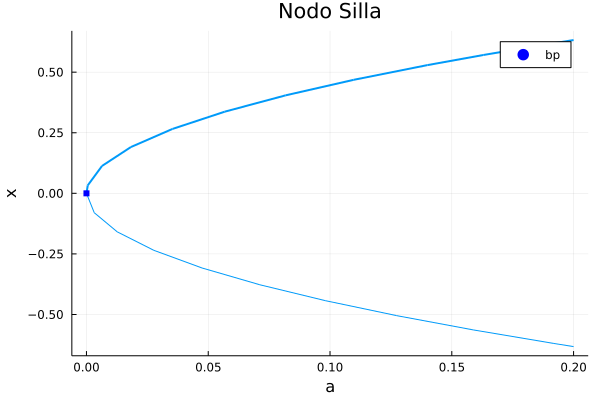

In [13]:
nodosilla2d(u,p) = nodosilla2d!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1,pMax=0.2, ds = -0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(nodosilla2d,[0.1,0.1],[0.2,2.0],(@lens _[1]), opts;recordFromSolution = (x, p) -> x[1])
plot(br1,xlabel="a",title="Nodo Silla")

# Bifurcacion Pitchfork en el plano

Vamos a volver al oscilador de Duffing con disipación:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

Con puntos fijos en:

Para $\beta<0$:
    
$x^*_1=0$ atractor

Para $\beta>0$:

$x^*_1=0$ punto silla

$x^*_{2,3} = \pm \sqrt{\beta}$ atractores

Cuando $\beta$ cruza el cero el punto fijo $x^*_1$ cambia de estabilidad de  (deja de ser atractor) y al mismo tiempo aparecen otros dos puntos fijos en posiciones simétricas. Esto es una bifurcacion de Pitchork. 

Pero notar que el cambio de estabilidad es de un nodo atractor a un punto silla (no un repulsor). Eso es porque hay una direccion (transversal a la parabola) que es siempre atractora, y ese punto fijo luego de la bifurcacion pasa a tener una direccion inestable (punto silla) y esa direccion inestable es en la direccion tangente a la parabola. 
Verificar eso en el grafico interactivo.

Si permitiesemos a la disipacion $\gamma$ tomar valores elevados tendíamos una situación similar al caso anterior donde la bifurcación esta ocurre sobre una curva (variedad) 1D mientras que hay una dirección transversal atractora. 
Sin embargo en el caso del oscilador de Duffing el interés por lo general está en valores intermedios o bajos de $\gamma$



In [14]:
#la Ed para el oscilador de Duffing definida in-place
function duffing!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[2]+u[1]*(p[2]-u[1]*u[1])
    du
end    

@manipulate for xini=-1:0.02:1,yini=-1.5:0.2:1.5,γ=0.0:0.01:2.0,β=-0.5:0.1:0.5
    flux2d_nullclines(duffing!,[xini;yini],50.0,[γ,β];ylims=[-1.5,1.5],title="Duffing")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000810af6c0, Task (runnable) @0x00000000810af6c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.98\",\"-0.96\",\"-0.94\",\"-0.92\",\"-0.9\",\"-0.88\",\"-0.86\",\"-0.84\",\"-0.82\",\"-0.8\",\"-0.78\",\"-0.76\",\"-0.74\",\"-0.72\",\"-0.7\",\"-0.68\",\"-0.66\",\"-0.64\",\"-0.62\",\"-0.6\",\"-

### Deteccion de la Pitchfork usando BifurcationKit

Vamos a usar BifurcationKit para barrer esta bifurcación. A diferencia del caso anterior esta bifurcación no tiene una sola rama (se considera la SN una sola rama que "pega la vuelta" en la bifurcacion). Por ello tenemos que detectar dos ramas y eso lo podemos hacer solo para valores de $\beta$ positivo donde tengo tres puntos fijos. 

La estrategia es utilizar dos puntos iniciales diferentes como guess del punto fijo, uno muy cerca de cero para el punto silla y otro en un valor grande para tender hacia el atractor (tener en cuenta que el algoritmo detecta puntos fijos de cualquier tipo por lo tanto es irrelevante que sea un atracto un punto silla o un repulsor pero si tiene que estar cerca)

Notar que en este caso estamos barriendo el segundo parámetro, de allí `@lens _[2]` y que tambien tenemos que barrer hacia los negativos en la rama parabolica (br1). En la otra rama (br1) da igual porque existe para valores positivos y negativos de $\beta$.

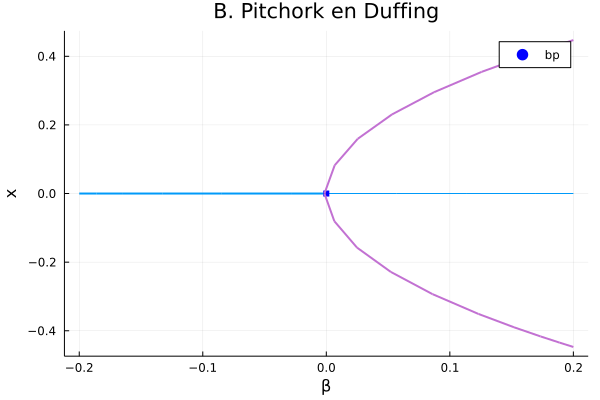

In [15]:
duffing(u,p) = duffing!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(duffing,[0.1,0.1],[0.1,-0.2],(@lens _[2]), opts)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds=-0.01, dsmax=0.04, detectBifurcation=3)
br2, = continuation(duffing,[-0.5,0.1],[0.1,0.2],(@lens _[2]), opts;recordFromSolution = (x, p) -> x[1])
plot(br1)
plot!(br2,xlabel="\\beta",title="B. Pitchork en Duffing")

# Bifurcacion de Hopf

En Flujos 2D existe otra bifurcacion que no existe en 1D. Cuando un punto fijo pierde estabilidad, pasa de ser atractor a repulsor lo hace a traves de un centro (foco atractor que se transforma en repulsor). Esto sucede cuando el Determinante del Jacobiano es positivo y la Traza cambia de signo pasando por cero. Recordar que en este caso los autovalores eran complejos (foco) y la parte real era la traza asi que otra forma de caracterizar esta bifurcacion es cuando para un punto fijo **ambos** autovalores cruzan el eje imaginario (parte real cero). 

En un sistema lineal eso significa unicamente un cambio de direccion en el flujo del foco (espiral atractor a repulsor). Pero en los sistemas no lineales los terminos de orden mas alto dan de forma generica origen a un ciclo limite que es expelido del foco y se produce una **Bifurcacion de Hopf** con el cambio de estabilidad. 

Hay dos tipos de Bifurcación de Hopf, **supercritica** y **subcritica**. Por ahora nos va a interesar mas la supercritica y para este tipo la historia es asi: de un lado de la bifurcacion (en la figura para $\beta<0$) tenemos un foco atractor, el Jacobiano tiene traza negativa. En la bifurcacion el foco se transforma en un centro ($\beta=0$) y las trayectorias se siguen aproximando (por los terminos no lineales) pero no convergen nunca al centro. Y luego de la bifurcacion el punto fijo pierde estabilidad y se transforma en repulsor. 

Pero ahora bien, como es una bifurcacion LOCAL el flujo lejos "no se entera" del cambio de estabilidad y sigue siendo atractor (dominan los terminos no lineales). Por lo tanto el flujo sigue siendo globalmente atractor y se acerca a la región del centro. Pero como al mismo tiempo es expelido de el por el foco repulsor, en alguna parte se tiene que acumular el flujo y se forma un ciclo limite estable. Es decir que del otro lado de la bifurcacion (para $\beta>0$) tengo un foco repulsor que alimenta a un ciclo limite atractor.

<div>
<img src="../files/hopf.png" width="500px">
</div>

La forma normal de la bifurcacion de Hopf (supercritica) es la siguiente


$\dot{x} = \beta x - y - x(x^2+y^2) $

$\dot{y} = x + \beta y - y(x^2+y^2) $

Parece complicado pero veamos primero que el punto fijo esta en $(0,0)$ y si queremos calcular el Jacobiano va a tener un monton de terminos pero solo van a sobrevivir los que no tengan ni $x$ ni $y$ porque esos van a ser cero. Asi que el Jacobiano evaluado en el punto fijo $(0,0)$ es solo el de la parte lineal y es:

$\begin{pmatrix}
\beta & -1\\
1 & \beta 
\end{pmatrix}$

La traza es $2\beta$ y el determinante siempre positivo $\beta^2+1$. Por lo tanto cuando $\beta$ cruza el cero cambia el signo de la Traza y el foco pasa de ser atractor a repulsor como muestra la figura.

Por otro lado los terminos no lineales tienen una expresion que equivale al radio al cuadrado $(x^2+y^2)$ con la variable cambiada de signo por lo tanto siempre van a ser atractores lejos. 

In [16]:
function hopf!(du,u,p,t)
    du[1] = p[1]*u[1] - u[2] - u[1]*(u[1]*u[1]+u[2]*u[2])
    du[2] = u[1] + p[1]*u[2] - u[2]*(u[1]*u[1]+u[2]*u[2])
    du
end

hopf! (generic function with 1 method)

In [17]:
@manipulate throttle=.05 for u1=-1:0.1:1,u2=-1:0.1:1,tmax=10:10:50,β=-0.5:.1:0.5
    prob = ODEProblem(hopf!, [u1; u2], (0, tmax), β)
    sol = solve(prob);
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="Hopf")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["u1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007b4b1f50, Task (runnable) @0x000000007b4b1f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

In [18]:
# multiples trayectorias
u0_arr = vec([[0.2*i-1,0.2*j-1] for i=0:10, j=0:10])
prob = ODEProblem(hopf!,u0_arr[1],(0,0.5),0.5)
ensamble_prob = EnsembleProblem(prob,prob_func=(prob,i,repeat;u0=u0_arr)->(remake(prob,u0=u0[i])))
sol = solve(ensamble_prob,EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),arrow=true,size=(600,600),title="Hopf")

In [19]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,β=-1.0:0.1:1.0
    flux2d_nullclines(hopf!,[xini;yini],50.0,[β];title="Hopf")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000773a6590, Task (runnable) @0x00000000773a6590), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

### Deteccion de la Hopf usando BifurcationKit

Vamos a usar BifurcationKit para detectar esta bifurcación. Este caso es relativamente sencillo, ya que el punto fijo existe a ambos lados de la bifurcación y tenemos una sola rama. Notar que, a diferencia de los casos anteriores en los que marcaba los puntos de bifurcación en el diagrama unicamente como "bp" (bifurcation point), ahora llevan la etiqueta de una Hopf.

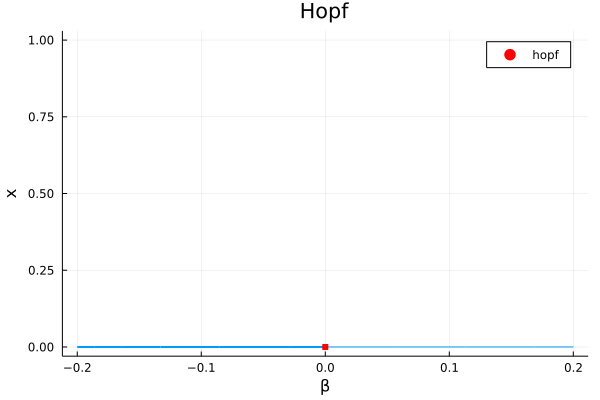

In [20]:
hopf(u,p) = hopf!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(hopf,[0.1,0.1],[-0.2],(@lens _[1]), opts)
plot(br1,xlabel="\\beta",title="Hopf")

## Forma normal de la Hopf en polares 

Podemos reescribir la forma normal de Hopf como:

$\begin{pmatrix}\dot{x}\\\dot{y}\end{pmatrix}=\begin{pmatrix}\beta & -1\\1 & \beta\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}-(x^2+y^2)\begin{pmatrix}x\\y\end{pmatrix}$ 


Vamos a cambiar ahora a coordenadas polares:

$\rho = \sqrt{x^2+y^2}, \quad \theta=\arctan\left({\displaystyle\frac{y}{x}}\right)$

con la transformación inversa:

$x = \rho \cos{(\theta)},\quad x = \rho \sin{(\theta)}$

Luego de operar algebraicamente y usando extensivamente la relación $\cos^2{(\theta)}+\sin^2{(\theta)}=1$ llegamos a un sistema mucho más simple en coordenadas polares:

$\dot{\rho} = \beta\rho - \rho^3$

$\dot{\theta} = 1$

que es la forma normal de la bifurcación de Hopf en coordenadas polares. 

Lo notable es que la segunda ecuación (la variación angular) es invariante y lo único que indica es que el flujo gira en torno al origen con velocidad angular constante (algo que se puede verificar en el flujo). Mientras que la primera ecuación para la variación en el radio tiene la misma forma que la bifurcación de pitchfork en 1D! Si bien hay que tener en cuenta que por definición $\rho \geq 0$.

Por lo tanto, al igual que en la pitchfork supercrítica vamos a tener, para $\beta<0$ un atractor en el origen en la dirección radial (que junto con la variación angular a velocidad constante dan lugar a una espiral atractora), mientras que para 
$\beta>0$ el punto fijo en $\rho=0$ se vuelve repulsor y aparece un punto fijo atractor en $\rho=\sqrt{b}$ que corresponde a un ciclo límite atractor con radio constante. 

El diagrama de bifurcaciones en la coordenada radial quedaría entonces para la Hopf (atencion que lo hacemos a mano y no usando BifurcationKit) :

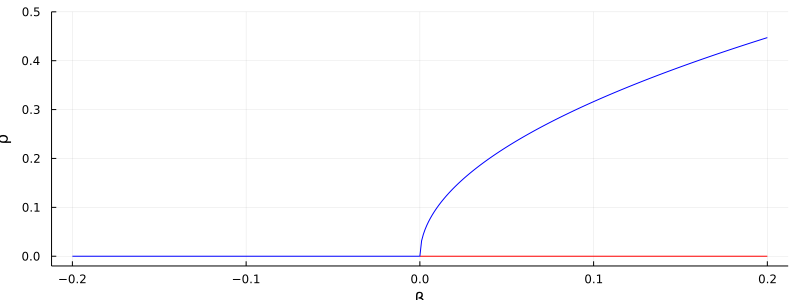

In [40]:
βneg = -0.2:0.001:0.0; βpos = 0.0:0.001:0.2
ρ2 = sqrt.(βpos)
plot(βneg,0*βneg,c=:blue,legend=false)
plot!(βpos,0*βpos,c=:red)
plot!(βpos,ρ2,c=:blue,ylims=(-0.02,0.5),xlabel="\\beta",ylabel="\\rho",size=(800,300))

### Amplitud de la oscilación de Hopf 

Recordamos que habiamos definido el diagrama de bifurcaciones en el espacio producto del (o los) parámetro(s) y las variables y graficábamos los conjuntos límite (hasta ahora puntos fijos) como ramas (curvas) coloréandolos según su estabilidad. 

En el caso de la Hopf, al tratarse de una bifurcación que involucra si o si dos variables (no tenemos como en el caso de la SN la relajación a una variedad unidimensional porque la variedad sobre la que ocurre la Hopf tiene que ser bidimensional), nuestro diagrama de bifurcaciones tendría que ser 3D, graficando los conjuntos límite en el espacio de fases $(x,y)$ en función de nuestro parámetro de bifurcación $\beta$.

Afortunadamente en el caso de la forma normal de Hopf es muy sencillo porque en coordenadas polares ya tenemos el diagrama de bifurcaciones en la variable radial y la variable angular lo único que hace es rotar el diagrama anterior en torno al origen. Como resultado, la rama estable de $\rho=\sqrt{\beta}$ determina un ciclo límite atractor cuya amplitud crece con la raíz cuadrada del parámetro y cuya velocidad angular ($\dot{\theta}$) es exactamente igual a 1:

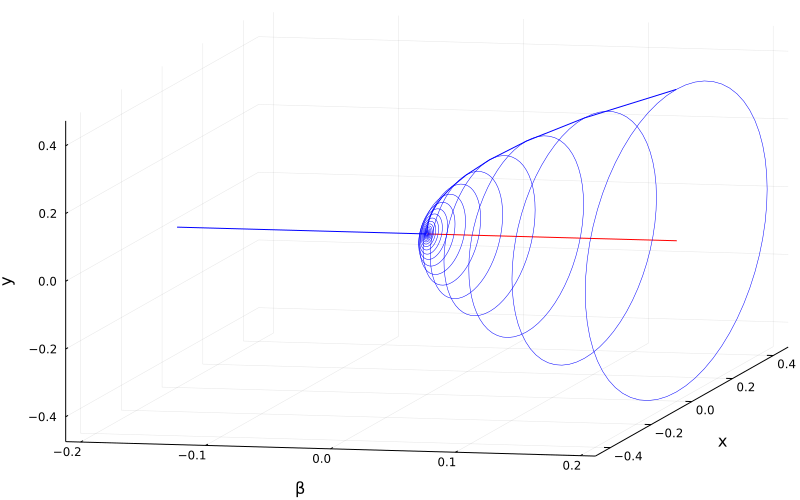

In [85]:
θlist = 0:π/30:2*π
βlist = 10 .^(-4.7:0.2:-0.7)
p1 = plot(βneg,0*βneg,0*βneg,c=:blue,legend=false)
plot!(p1,βpos,0*βpos,0*βneg,c=:red)
plot!(p1,βlist,0*βlist,sqrt.(βlist),c=:blue)
for β in βlist
    ρ = sqrt(β)
    plot!(p1,β.+0*θlist,ρ*cos.(θlist),ρ*sin.(θlist),c=:blue,linewidth=0.5)
end    
plot(p1;xlabel="\\beta",ylabel="x",zlabel="y",size=(800,500),camera=(20,35))

### Frecuencia de la oscilación de Hopf

Vamos a modificar ligeramente la forma normal agregándole un parámetro adicional $\omega$ en la parte lineal.

$\begin{pmatrix}\dot{x}\\\dot{y}\end{pmatrix}=\begin{pmatrix}\beta & -\omega\\\omega & \beta\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}-(x^2+y^2)\begin{pmatrix}x\\y\end{pmatrix}$ 

Si calculamos los autovalores de la parte lineal resulta que en la bifurcación $\omega$ corresponde a la parte imaginaria del autovalor y $\beta$ es la parte real que se anula. En efecto de la matiz lineal tenemos que el determinante es $\Delta=\omega^2$ y la traza es $\tau=\beta$, por lo tanto:

$\lambda_{\pm} = \frac{\tau\pm\sqrt{\tau^2-4\Delta}}{2} = \beta/2 \pm{\sqrt{(\beta/2)^2-\omega^2}}{2}$

En la bifurcación $\beta=0$ y los autovalores son puramente imaginarios

$\lambda_{\pm} = \pm i\omega$

Cuando pasamos a coordenadas polares resulta evidente el rol que cumple $\omega$:

$\dot{\rho} = \beta\rho - \rho^3$

$\dot{\theta} = \omega$

es decir que es precisamente la frecuencia angular del ciclo límite que surge en la Hopf.



Es importante notar que esta separación de variables puede hacerse para la forma normal pero no de forma general. Sin embargo, al igual que con el resto de las bifurcaciones, **todo sistema genérico que anule la parte real de un par de autovalores conjugados es topológicamente equivalente a la forma normal de la Hopf**, por lo tanto para esos sistemas también tendremos el nacimiento de un **ciclo límite que aparece con amplitud proporcional a la raíz cuadrada del parámetro de bifurcación y con una frecuencia de oscilación aproximada por la parte imaginaria del autovalor**.

## Ejemplos simples de bifurcaciones de Hopf

### Lengüeta de Rayleigh
Como un ejemplo simple consideremos el modelo de Rayleigh de la lengüeta:


$\dot{x} = y $

$\dot{y} = \mu y-y^3-kx$


con un único punto fijo en el origen. El Jacobiano de forma general es:

$\begin{pmatrix}
0 & 1\\
-k & \mu-3y^2 
\end{pmatrix}$

evaluado en el punto fijo $x=0$, $y=0$ es 

$\begin{pmatrix}
0 & 1\\
-k & \mu 
\end{pmatrix}$

que tiene determinante siempre positivo $\Delta=k$ y la traza igual al parámetro $\mu$. El punto fijo es atractor para $\mu<0$ y repulsor para $\mu>0$. Cuando $\mu=0$ la traza se anula y los autovalores son puramente imaginarios:

$\lambda_1 = \frac{\tau\pm\sqrt{\tau^2-4\Delta}}{2} = \pm\frac{\sqrt{-4k}}{2}  = \pm i\sqrt{k}$

Tenemos una bifurcación de Hopf y encontramos la relación entre el parámetro de elasticidad $k$ y la frecuencia de oscilación en la bifurcación: $k=\omega^2$ al igual que en el oscilador armónico. Sabemos además que la amplitud de las oscilaciones va a crecer de forma suave al principio como $\sqrt{\mu}$ 

### van der Pol sesgado

Hay una condición más para que se produzca la bifurcación de Hopf y es que en la bifurcación persistan términos no lineales (en realidad están vinculados con la segunda derivada del campo vector pero no vamos a entrar en ese detalle técnico). 

Por ese motivo en el oscilador de van der Pol no tenemos una bifurcación de Hopf, si bien cuando $\mu=0$ los autovalores tienen parte real cero, ya que para este valor de parámetro también se anula el único no lineal $-\mu x^2y$. Como consecuencia, no hay ciclos límites "pequeños" cerca de la bifurcación sino que el ciclo límite ya nace "grande" como una oscilación de relajación. 

Sin embargo, basta con perturbar el sistema con una variable constante (lo que se conoce como sistema de van der Pol sesgado) y tenemos una bifurcación de Hopf:

$\dot{x} = y$

$\dot{y} = \mu (1 -x^2)y - x  + a$

Este sesgo corre el punto fijo del origen al punto $(x_*,y_*)=(a,0)$. Notar que este corrimiento no es un mero cambio de coordenadas porque afecta al flujo global. Esto último se puede probar con un cambio de coordenadas llevando el punto fijo al origen (definiendo una nueva variable $x_1=x-a$) y viendo que aparecen otros términos no lineales y que la dependencia con la perturbación $a$ queda incorporada en el parámetro para el cual se produce la bifurcación. Pero vamos a ver lo mismo en el sistema escrito ahi arriba de forma más simple. La matriz Jacobiana queda de forma general:

$\begin{pmatrix}
0 & 1\\
-1-2\mu xy & \mu (1-x^2)
\end{pmatrix}$

que evaluada con $x=a$ y $y=0$ resulta en la matriz de linealización en un entorno del punto fijo:

$\begin{pmatrix}
0 & 1\\
-1 & \mu (1-a^2)
\end{pmatrix}$

Como en el caso anterior el determinante es siempre positivo $\Delta=1$ pero la traza incluye a ambos parámetros $\mu(1-a^2)$. Entonces haciendo $\mu \neq 0$ evadimos la degeneración del van der Pol original y obtenemos una bifurcación de Hopf cuando $a$ cruza el valor 1 o -1. 

Esto se puede explorar en el gráfico interactivo de abajo


In [86]:
function vdp_biased!(du,u,p,t)
    (μ,a) = p
    du[1] = u[2]
    du[2] = μ*(1.0-u[1]*u[1])*u[2]-u[1]+a
    du
end   

vdp_biased! (generic function with 1 method)

In [87]:
@manipulate throttle=.05 for u1=-1:0.1:1,u2=-1:0.1:1,tmax=10:10:50,a=-1.5:0.01:1.5
    prob = ODEProblem(vdp_biased!, [u1; u2], (0, tmax), [1.0,a])
    sol = solve(prob);
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="van der Pol sesgado")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["u1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f0b04c0, Task (runnable) @0x000000000f0b04c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

# Bifurcaciones Globales en Flujos 2D. 

Como anticipamos cuando introducimos los flujos 2D, ademaás de ciclos límites y bifurcaciones de Hopf, la novedad que introducen los sistemas en el plano es la posibilidad de tener cambios cualitativos en el flujo que no pueden reducirse a lo que pasa en un entorno local de los puntos fijos, y se conoces como **bifurcaciones globales**.

Al no poder determinarse a partir del estudio de los autovalores del sistema linealizado, resultan más dificiles de detectar y caracterizar. Vamos a limitarnos a describirlas mediante ejemplos y limitarnos a las que dan origen a un ciclo límite: estas son 
- La **bifurcación homoclínica** o saddle-loop
- La bifurcación nodo silla sobre un ciclo límite **SNLC**, o saddle node heteroclínica, o saddle node de período infinito (SNIPER) o bifurcacion de Andronov. Es la misma bifurcación con distintos nombres (!)
- La bifurcación de nodo silla de órbitas periódicas 

Todas estas bifurcaciones están asociadas a la creación o destrucción de ciclos límites atractores o repulsores. Si a esta lista sumajmos la bifurcación local de Hopf tenemos de forma genérica cuatro formas diferentes de dar origen a auto oscilaciones en flujos 2D. Lo interesante es que cada una sigue diferentes "leyes de escala", cerca de la bifurcación. La ley de escala se refiere a como varían la amplitud y la frecuencia de oscilación en un entorno de la bifurcación. Para la Hopf ya vimos que la amplitud del ciclo límite crecía desde cero como la raiz cuadrada del parámetro y que aparecian con un período determinado por la parte imaginaria del autovalor.

## Bifurcacion Homoclínica

Vamos a considerar el siguiente sistema:

$\dot{x} = y$

$\dot{y} = \mu y + x - x^2 + xy$

Con puntos fijos siempre en $\bf{u^*_1}=(0,0)$ y $\bf{u^*_2}=(1,0)$

El Jacobiano de forma general es:

$\begin{pmatrix}
0 & 1\\
1-2x+y & x-\mu
\end{pmatrix}$

que evaluado en los puntos fijos nos determina la estabilidad.

Para  $\bf{u^*_1}=(0,0)$:

$\begin{pmatrix}0 & 1\\1 & -\mu\end{pmatrix}\quad\rightarrow\quad \Delta=-1 \quad$ es un punto silla siempre

y para  $\bf{u^*_2}=(1,0)$:

$\begin{pmatrix}0 & 1\\-1 & 1-\mu\end{pmatrix}\quad\rightarrow\quad \Delta=1,\quad\tau=1-\mu$ 

El único cambio de estabilidad ocurre para $\mu=1$ y corresponde a una bifurcación de Hopf.

Sin embargo del estudio del retrato de fases emerge otro cambio cualitativo en el flujo para un valor de $\mu$ ligeramente menor como puede explorarse en el gráfico de abajo donde se representan las variedades estable e inestable del punto silla en el origen. La estabilidad del nodo/foco de la derecha está indicada por el color (rojo corresponde a inestable).

In [106]:
function sloop!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[2]+u[1]*(1+u[2]-u[1])
    du
end    

function sloop_jac(u,p)
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = 1.0-2*u[1]+u[2]
  J[2,2] = u[1]-p[1]
  return J
end


@manipulate throttle=0.5 for μ=0.8:0.001:1.1
    u0_array=[[0.0;0.0],[1.0;0.0]]
    flux2d_manifolds(sloop!,sloop_jac,u0_array,[μ];tmax=300,delta=1e-8,xlims=[-0.5,1.5],title="Saddle Loop")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f379aa0, Task (runnable) @0x000000000f379aa0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.8\",\"0.801\",\"0.802\",\"0.803\",\"0.804\",\"0.805\",\"0.806\",\"0.807\",\"0.808\",\"0.809\",\"0.81\",\"0.811\",\"0.812\",\"0.813\",\"0.814\",\"0.815\",\"0.816\",\"0.817\",\"0.818\",\"0.819\",\"0.82\",\"0.

Podemos describir los cambios cualitativos del retrato de fases partiendo de un valor de $\mu>1$. En este caso tenemos el punto silla en el origen y un foco atractor a la derecha. La variedad estable rodea en un lazo  abierto el atractor delimitando su cuenca de atracción, la rama izquierda de la variedad inestable diverge y la rama derecha alimenta el atractor. 

Cuando cruzamos $\mu=1$ el foco pierde estabilidad, se produce una bifurcación de Hopf y emite un ciclo límite atractor. Para valores de $\mu$ ligeramente menores a 1 la rama derecha de la variedad inestable del saddle alimenta ahora al ciclo límite estable por fuera (por dentro es alimentado por el repulsor). 

Lo interesante es que a medida que $\mu$ sigue bajando el ciclo límite sigue creciendo (al principio de forma proporcional a $\sqrt{1-\mu}$) y acercandose a la variedad estable que lo rodea y al punto silla. Cuando $\mu=0.867$ (ver) la rama derecha de la variedad inestable y el ciclo límite atractor están ambos practicamente pegados a la rama derecha de la variedad estable. Cuando $\mu$ es aproximadamente igual a 0.865 (ver) el ciclo límite colisiona con el punto silla (su período se hace infinito) y **las ramas derechas de las variedades estable e inestable del saddle se fusionan** formando un loop (de ahi el nombre), lo que se conoce también como una conexión **homoclínica**.

Para valores de $\mu$ menores las ramas de las variedades estan cruzadas como si hubiesen pasado una a traves de la otra. En efecto, antes la variedad inestable estaba dentro, rodeada por la estable y ahora la variedad estable esta adentro (y de hecho es alimentada por el foco repulsor que antes alimentaba al ciclo límite que ya no está) y la variedad inestable la rodea por fuera. Se trata sin duda de un flujo que es topológicamente distinto de un lado y del otro de $\mu \approx 0.865$, por lo tanto en ese punto se produjo una bifurcación que no puede reducirse al estudio de la estabilidad de puntos fijos. Esta es la **bifurcación homoclínica** o **saddle loop**.

Otra forma de describir esta bifurcación es para valores de $\mu$ crecientes. En ese caso es la variedad inestable que se va pegando cada vez más a la estable desde afuera hasta formar un saddle loop en la bifurcación. Ahora bien, visto desde este punto de vista (viniendo desde $\mu<0.865$) podemos considerar que la bifurcación homoclínica da nacimiento a un ciclo límite estable con período infinito (sobre la bifurcación) que va achicándose hasta colapsar con el repulsor en $\mu=1$ y dar origen a un foco atractor (es una bifurcación de Hopf que sigue siendo supercrítica pero contada al revés). 

Es decir que a diferencia de los ciclos límites que se originan en una Hopf, los ciclos límites que nacen de una conexión homoclínica aparecen con período infinito y con una amplitud fija (el tamaño del saddle loop). 

Además de esta doble diferencia con la Hopf, las oscilaciones que se aproximan a su aniquilación con un saddle loop (o "nacen de el" segun como lo veamos) tienen una característica que tiene una reminescencia del fenómeno de Critical Slowing Down. La parte de la órbita que se está cerca del saddle es muy angulada y se enlentece. 

Por qué hacemos énfasis en esta diferencia? Porque  a diferencia de las oscilaciones que nacen de una Hopf que son suaves y bastante sinusoidales (al menos al prinicpio muy cerca de la bifurcación), las del saddle loop nacen como con una forma característica de picos. Una última observación que luego nos va a servir para distinguir esta bifurcación de otra global es que si bien en teoría el período tiene a infinito a medida que nos acercamos a la bifurcación lo hace de una forma muy lenta.

Esto se puede explorar en el gráfico de abajo, donde el período varía aproximadamente entre 10 y 15 a pesar de que nos acercamos bastante a la bifurcación.

In [111]:
@manipulate throttle=.05 for tmax=1.0:1.0:50,μ=0.8655:0.0001:0.88
    prob = ODEProblem(sloop!, [0.005; 0.0], (0, tmax), [μ])
    sol = solve(prob);
    p1 = plot(sol,vars=(0,1))
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="Saddle Loop")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["tmax"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 50, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f6195f0, Task (runnable) @0x000000000f6195f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"2.0\",\"3.0\",\"4.0\",\"5.0\",\"6.0\",\"7.0\",\"8.0\",\"9.0\",\"10.0\",\"11.0\",\"12.0\",\"13.0\",\"14.0\",\"15.0\",\"16.0\",\"17.0\",\"18.0\",\"19.0\",\"20.0\",\"21.0\",\"22.0\",\"23.0\",\"24.0\",\"

## Bifurcaciones en Ciclos Límites

## Nodo silla sobre ciclo límite (SNLC)

Vamos a considerar el siguiente sistema:

$\dot{x} = y$

$\dot{y} = \mu+ x^2 -xy - x^3 -x^2y$ 

que no es el mas simple que presenta esta bifurcación pero nos va a servir luego. El cálculo de los puntos fijos se dificulta porque hay que resolver:

$f(x)=\mu+x^2-x^3=0$

que por supuesto se puede hacer numericamente. 

Pero, sin necesidad de saber la posición de los puntos fijos con exactitud, podemos saber que al variar $\mu$ vamos a cruzar dos bifurcaciones de saddle node. En efecto, la cúbica es de tipo "N" porque los términos cuadrático y cúbico tienen distinto signo y podemos calcular mas facilmente el pico y el valle de esta "N" cubica porque esto va a suceder cuando su derivada sea cero, es decir para los dos puntos que cumplen: $x(2-3x)=0$. En un gráfico de $f(x)$ esos puntos van a a estar en $(0,\mu)$ y en $(2/3,\mu+4/27)$. Es decir que dibujando a mano la cubica va a tener este aspecto

<div>
<img src="../files/sniper1.png" width="400px">
</div>

El cambio de tener tres a un punto fijo va a suceder cuando $\mu=0$ y cuando $\mu=-4/27\approx -0.148$. Nos interesa este ultimo caso:

<div>
<img src="../files/sniper2.png" width="400px">
</div>

Donde deberia producirse una bifurcación de nodo silla en $x=2/3$ $y=0$. Queda como tarea ver que el Jacobiano tiene como determinante en los puntos fijos $\Delta=x(2-3x)$ que se anula para $x=2/3$.

Sin embargo hay una característica global del flujo que no se captura con la linealización como se puede ver en el gráfico de abajo donde barremos el parámetro en un entorno de la bifurcación de nodo silla que se produce para $\mu=-4/27$.

In [134]:
function sniper!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

@manipulate throttle=0.5 for μ=-0.16:0.001:-0.14
    phase_portrait(sniper!,[μ];tmax=200,delta=1e-6,xlims=[-1.5,1.5],title="Sniper")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f61b850, Task (runnable) @0x000000000f61b850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.16\",\"-0.159\",\"-0.158\",\"-0.157\",\"-0.156\",\"-0.155\",\"-0.154\",\"-0.153\",\"-0.152\",\"-0.151\",\"-0.15\",\"-0.149\",\"-0.148\",\"-0.147\",\"-0.146\",\"-0.145\",\"-0.144\",\"-0.143\",\"-0.142\",\"-0.

Si partimos con el slider desde la izquierda para un valor $\mu<4/27$ vemos que hay un solo punto fijo repulsor que alimenta un ciclo límite atractor, que circula en sentido horario como lo indica el sentido de la espiral. 

La forma del ciclo límite es bastante particular porque tiene un "pico" hacia la izquierda. Este pico se puede explicar por la aparición de la rama curvada de la nulclina de $\dot{y}=0$ (en verde). En efecto la trayectoria que cruza verticalmente la nulclina roja desde arriba no puede cruzar la nulclina verde y se desplaza hacia la izquierda muy pergada a esa curva. En esa zona el flujo se enlentece por la proximidad de la saddle node (como vamos a ver de una forma mucho más dramática que en el saddle loop). 

A medida que $\mu$ se va acercando a la bifurcación desde abajo la nulclina verde se acerca más a la roja hasta que para $\mu<4/27$ la toca tangencialmente y se produce una bifurcación de nodo silla. Pero la particularidad de esta bifurcación es que la creación de los dos puntos fijos se produce **sobre el ciclo límite atractor**. Esto tiene que ser asi porque la trayectoria del ciclo límite en esa parte inferior del pico queda atrapada entre las dos nulclinas. 


Como consecuencia **el ciclo límite atractor desaparece** y se forma una **conexión heteroclínica** entre los dos puntos fijos. Antes se llamaba "homoclinica" a la conexión entre las variedades de un mismo punto silla. Ahora tenemos la conexión entre la variedad inestable del punto silla y el punto fijo atractor. De hecho, como se puede ver para $\mu>4/27$ las dos ramas de la variedad inestable forman un lazo cerrado que rodean al repulsor que antes alimentaba al ciclo límite y ahora esta conectado con una de las ramas de la variedad estable del punto silla. A diferencia de la conexión homoclínica que solo ocurria en la bifurcación esta conexión heteroclinica es persistente, robusta y es una caracteristica global del flujo que no puede derivarse del análisis local del equilibrio.

Esta bifurcación se conoce como **saddle node sobre ciclo límite**, o **saddle node de periodo infinito** (Sniper por las siglas en inglés) o saddle node con conexión heteroclínica.

Al igual que en el caso anterior es instructivo también pensar la bifurcación en el sentido inverso. Para valores $\mu>4/27$ tenemos un punto silla cuyas variedades inestables alimentan un nodo atractor (conexión hetetroclínica). Esta conexión heteroclínica forma un lazo cerrado que divide el flujo de adentro del de afuera, pero en este caso hay un único atractor (el nodo) que es alimentado desde afuera porque el flujo es globalmente atractor y tiene que estar alimentado desde adentro por algún conjunto repulsor (punto fijo o ciclo límite inestable). 

A medida que nos vamos acercando a la bifurcación desde arriba el punto silla y el nodo se van aproximando y cuando colapsan el lazo cerrado de la conexión heteroclínica se cierra con un punto de estabilidad marginal en ($x=2/3$,$y=0$) formando una órbita cerrada con período infinito. Esa órbita además es atractora desde adentro debido al repulsor y desde afuera porque estaba embebida en la cuenca de atracción del nodo. Para $\mu<4/27$ se transforma en un ciclo límite atractor. 

Al igual que la bifurcación de saddle loop esta bifurcación da origen a un ciclo límite de amplitud definida (el tamaño del lazo heteroclínico) y período infinito. Sin embargo se puede diferenciar de la anterior debido a que el aumento del período cerca de la bifurcación escala mucho más rápido, como se puede apreciar en el gráfico de abajo. 

In [141]:
@manipulate throttle=.05 for tmax=10.0:10.0:500, μ=-0.16:0.0001:-0.1482
    prob = ODEProblem(sniper!, [0.66; 0.0], (0, tmax), [μ])
    sol = solve(prob);
    p1 = plot(sol,vars=(0,1))
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="Sniper")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["tmax"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 50, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f7aa0e0, Task (runnable) @0x000000000f7aa0e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10.0\",\"20.0\",\"30.0\",\"40.0\",\"50.0\",\"60.0\",\"70.0\",\"80.0\",\"90.0\",\"100.0\",\"110.0\",\"120.0\",\"130.0\",\"140.0\",\"150.0\",\"160.0\",\"170.0\",\"180.0\",\"190.0\",\"200.0\",\"210.0\",\"220.0\

Se puede mostrar que el frecuencia tiende a cero y escala cerca de la bifurcación como la raíz cuadrada del parámetro, es decir que crece como una ley de potencia. 

## Bifurcaciones en Ciclos Límites
## Nodo silla de ciclos límites

La ultima bifurcación global que da lugar a autooscilaciones que vamos a ver es el equivalente de la bifurcación de atractor repulsor para puntos fijos en 1D pero para ciclos límites. 

Cuando veamos sistemas forzados vamos a definir más formalmente una sección  de Poincaré, pero por ahora vamos a imaginarnos que tomamos un segmento $\Pi$ como se ve en la figura en verde, que es cortado por una trayectoria espiral en azul que va hacia un atractor $S$ varias veces en los puntos $s_1$, $s_2$, $s_3$, ...etc. Podemos representar esto como un mapa 1D sobre $\Pi$ que evoluciona en el sentido de la flecha verde (recordar que un mapa es un sistema dinámico pero con tiempo discreto). En verdad si bien no hay un flujo, todos los puntos que se obtienen de las trayectorias que cortan $\Pi$ evolucionan en el sentido de la flecha verde. 

<div>
<img src="../files/poincare2d.png" width="400px">
</div>

Por otra parte si en lugar de una espiral atractora hubiesemos seccionado una repulsora la flecha verde apuntaría para afuera, y si tuviésemos una órbita cerrada eso correspondería a un punto fijo en $\Pi$, es decir a un punto que evoluciona (se mapea) sobre si mismo.

Vamos a imaginarnos ahora que tomamos una sección $\Pi$ pero en un entorno de un ciclo límite estable $C$. El ciclo límite es una trayectoria cerrada por lo tanto corresponde a un punto fijo $c$ en la sección $\Pi$. Pero además ese punto fijo es atractor porque las trayectorias que estan por fuera, por ejemplo $S$, convergen hacia el (puntos $s_1$, $s_2$, $s_3$, ... etc) y las trayectorias que estan cerca (por ejemplo $Z$) también.

<div>
<img src="../files/poincare2dciclo.png" width="400px">
</div>

Es decir que en un entorno de órbitas periódicas o ciclos límites (o incluso espirales) podemos tener una representación unidimensional en la forma de un mapa. 

Finalmente, como se trata de un sistema no lineal nos podemos preguntar que sucede con posibles cambios de estabilidad de los puntos fijos en la sección $\Pi$. El cambio cualitativo genérico en sistemas 1D es la bifurcación de atractor-repulsor. En la secuencia de abajo se muestra la consecuencia de tener una bifurcación de repulsor/atractor sobre la sección $\Pi$.

<div>
<img src="../files/saddlenodeCL.png" width="800px">
</div>

A la izquierda tenemos una espiral atractora, no hay puntos fijos sobre $\Pi$, pero se forma una zona $S$ donde el radio de la espiral no decrece tan de prisa como en otras zonas, es decir que la evolución sobre $\Pi$ se enlentece en esa zona (no el flujo sobre las órbitas). Ese enlentecimiento anuncia la proximidad de una bifurcacion de atractor-repulsor en ese punto de $\Pi$. Cuando se produce la bifurcación se crean un par puntos fijos ($A$ y $R$) sobre la sección, que se corresponden con un par de ciclos límites en el flujo total: uno atractor (CA) por fuera que sigue atrayendo el flujo global y un repulsor por dentro (CR) que sigue alimentando hacia adentro. A su vez entre ambos ciclos límites el flujo circula en una espiral creciente desde el repulsor hacia el atractor. Si bien esta es una bifurcación local en la sección $\Pi$ en el flujo es una bifurcación global.

Veamos un ejemplo para 

## Ciclo Límite y Bifurcación de Hopf en Modelo de Predador Presa

Vamos a ver un ejemplo de sistema que sufre una bifurcación de Hopf supercrítica y da origen a autooscilaciones. Se trata de un modelo poblacional de dos especies, una que preda a la otra. A diferencia del modelo de Lotka-Volterra que no presentaba **estabilidad estructural** en este caso para ciertos valores de parámetros vamos a tener un ciclo límite atractor que va a dar lugar a oscilaciones robustas en ambas poblaciones: si el sistema está oscilando en este ciclo y realizamos una perturbación razonable que no lleve a la extinción luego de un tiempo el sistema vuelve a la misma órbita periódica (y no salta de orbita como pasaba en el LV).

### [OPCIONAL] descripcion y adimensionalizacion del modelo

Podemos plantear un modelo de Predador-Presa más realista y ver si podemos obtener auto oscilaciones. Para empezar podemos reemplazar el termino de crecimiento exponencial $bx$ de la presa por un crecimiento logistico con una capacidad $K$. Luego en lugar de asumir que el impacto de la predacion en la poblacion de la presa es siempre proporcional al producto de la presa por el predador podemos asumir que satura en un momento determinado (el predador no es insaciable). Si $N$ es la poblacion de la presa y $P$ la del predador la ecuacion para la varicion de la poblacion de la presa seria:

$\dot{N}=RN \displaystyle \left( 1-  \frac{N}{K} \right) - PNf(N)$

Con $f(N)$ una funcion que satura, vamos a tomar una forma simple $f(N) = A/(N+C)$.

Por otro lado podemos suponer simplemente para la poblacion del predador $P$ un crecimiento logistico donde la capacidad es proporcional a la poblacion de la presa con lo cual la segunda ecuacion quedaria:

$\dot{P}=SP\displaystyle \left(1-\frac{P}{BN}\right)$

Tenemos seis parametros ($R,S,K,A,B,C$), pero se pueden reducir si adimensionalizamos las poblaciones: $x=N/K$ $y=P/(BK)$. Al principio las ecuaciones se complican (dividimos la de arriba por $K$ y la de abajo por $BK$):

$\displaystyle\frac{d(N/K)}{dt}=\displaystyle\frac{RN}{K} \displaystyle \left( 1-  \frac{N}{K} \right) - \displaystyle\frac{PAN}{K^2(N/K+C/K)}$

$\displaystyle\frac{d(P/(BK))}{dt}= \displaystyle\frac{SP}{BK}\displaystyle \left(1-\frac{P}{BN}\right)$

reemplazando por la definición de las variables adimensionalizadas, dividiendo ambas ecuaciones por $R$ y reescalando el tiempo por $\tau=tR$:

$\displaystyle\frac{dx}{d\tau}=x\displaystyle \left( 1-  x \right) - \displaystyle\frac{ABxy}{R(x+C/K)}$

$\displaystyle\frac{dy}{d\tau}= \displaystyle\frac{S}{R}y\displaystyle \left(1-\frac{y}{x}\right)$


si redefinimos parametros: $a=AB/R$, $b=S/R$, $c=C/K$ las ecuaciones para las poblaciones adimensionalizadas de presa ($x$) y predador ($y$) quedan escritas de una forma mas compacta (ahora el punto es la derivada con respecto a $\tau$)

## Modelo adimensionalizado

$\dot{x} = x(1-x)-\displaystyle \frac{axy}{x+c}$

$\dot{y} = by\displaystyle \left( 1-\frac{y}{x}\right)$

que depende solo de tres parametros $a,b,c$. La contra es que ahora los parametros son mas dificiles de interpretar. Por ejemplo $b$ representa como es la tasa de crecimiento de la poblacion de predadores **relativa** a la tasa de crecimiento de la poblacion de presas, $c$ esta vinculada a la fraccion de la poblacion maxima de presa a la que satura la predacion, pero $a$ es mas dificil de interpretar ya que crece tanto con la accion de la predacion como con la capacidad de la poblacion de los predadores relativa a la capacidad de la poblacion de la presa.

Para un valor fijo de $a>0.5$ las dos poblaciones llegan a un punto fijo con un mismo valor $x=y$ para valores de $b$ y $c$ altos, pero si esto parametros disminuyen las poblaciones comienzan a oscilar. A diferencia del modelo de Lotka-Volterra, esta oscilacion es estructuralmente estable, todas las trayectorias convergen al **ciclo limite**. 

In [ ]:
function predatorprey!(du,u,p,t)
    (a,b,c) = p
    du[1] = u[1]*((1.0-u[1]) - a*u[2]/(c+u[1]))
    du[2] = b*u[2]*(1.0-u[2]/u[1])
    du
end    

In [ ]:
@manipulate throttle=0.2 for xini=0:0.1:1, yini=0:0.1:1,a=0.01:0.01:2,b=0.01:0.01:1,c=0.01:0.01:1
    flux2d_nullclines(predatorprey!,[xini;yini],100.0,[a,b,c],xlims=[0.01,1.0],ylims=[0.01,1.0])
end    

Si bien las ecuaciones parecen mas complicadas las nulclinas no lo son tanto restringidas al dominio no negativo. Ademas de una nulclina en $y=0$ tenemos la recta $y=x$ para la segunda nulclina (linea diagonal verde) y una cuadratica que sale de la primera ecuacion que puede despejarse como:

$y=(x+c)(1-x)/a$

que es una parabola invertida que corta el eje horizontal en los puntos $x=1$ , $x=-c$ (fuera del dominio), y corta el eje vertical en $y=c/a$

En el dominio tenemos dos puntos fijos:

- donde se corta la parabola con el eje horizontal $x=1$, $y=0$ que es siempre un punto silla (esto se puede ver calculando el Jacobiano que en ese punto fijo tiene determinante igual a $-b$)
- donde se corta la parabola con la diagonal $x=y$ vamos a calcular la ubicacion de es punto fijo que es el que da lugar a la bifurcacion de Hopf


Haciendo $y=x$ en la ecuacion del a nulclina de la parabola y tomando solo la solucion positiva dentro del dominio tenemos:

$x_*  =   \frac{1-a-c}{2} + \sqrt{ \left( \frac{1-a-c}{2} \right)^2 + c}$

aun cuando $1-a-c$ es negativo la raiz es mayor en modulo por lo tanto siempre hay una raiz positiva.

Notar que tanto el punto fijo como las nulclinas no dependen del parametro $b$ sin embargo este si influencia en la estabilidad. 

## Estabilidad de los puntos fijo (opcional)

Calcular el jacobiano y evaluarlo los puntos fijos puede ser un poco arduo pero fijando $a=1$ y luego de algunas cuentas el Jacobiano queda expresado:

\begin{pmatrix}
1 -2x - \frac{cy}{(x+c)^2} & -\frac{x}{x+c}\\
b\frac{y^2}{x^2} & -b
\end{pmatrix}

el punto fijo es ahora 

$x_*  =  \displaystyle -\frac{c}{2} + \sqrt{\displaystyle \frac{c^2}{4}  + c}$

tras un poco de algebra la matriz Jacobiana queda:

\begin{pmatrix}
\frac{c^2}{2}  +\frac{5c}{2}+1-(c+3)\sqrt{\frac{c^2}{4}+c} & \sqrt{\frac{c^2}{4}+c}-\frac{c}{2}-1\\
b & -b
\end{pmatrix}


El determinante queda un poco mas simple:

$\Delta = b\left( (c+2)\sqrt{\frac{c^2}{4}+c}-\frac{c^2}{2}- 2c\right)$

que con un poco de trabajo (o graficando) se puede ver que es siempre negativo. 

Mientras que la traza puede ser positiva o negativa y se hace cero cuando (condicion de la bifurcacion de Hopf):

$b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$

En la seccion siguiente vamos a ver el significado de esa condicion expresada como $b$ en funcion de $c$ que determina una curva en el espacio de parametros $(b,c)$.

# Codimension de una bifurcacion

Si bien en el modelo anterior tuvimos que mover tres parametros para buscar la bifurcacion de Hopf (probar por ejemplo con $a=1$, $b=0.25$ y bajar el parametro $c$ cruzando el valor $0.1$), en realidad la bifurcacion de Hopf,  al igual que la de nodo-silla, se cruza moviendo un solo parametro. Mas adelante vamos a ver bifurcaciones donde es necesario sintonizar dos parametros de forma simultanea para "pegarle" a la bifurcacion. De manera informal la cantidad de parametros que es necesario ajustar de forma simultanea para cruzar una bifurcacion corresponde a la **codimension** de la bifurcacion (hay una definicion mas formal pero no es relevante ahora). Todas las bifurcaciones que vimos hasta ahora son de codimension 1.

Por ejemplo en el caso anterior podemos fijar $a=1$, $b=0.25$ y buscar la bifurcacion de Hopf usando solo el parametro $c$. En este caso nuestro "espacio de parametros" es 1D. Pero tambien podemos fijar $a$ y $c$ y usar $b$ (queda como ejercicio la otra posibilidad de usar $a$ como parametro de la bifurcacion). 

Que sucede si fijamos $a=1$ y usamos un espacio de parametros 2D formado por los restantes parametros? Esto es absolutamente legitimo. En ese caso la bifurcacion de Hopf no ocurre en un punto sino en una curva en ese plano que se puede cruzar en ambas direcciones (es decir no es paralela a uno de los ejes). Este tipo de diagrama de bifurcacion es util porque si bien la bifurcacion puede ser de codimension 1 nos puede interesar como esa bifurcacion depende de dos parametros de control. La curva que derivamos en la seccion anterior como condicion de Hopf (la traza nula con el determinante positivo), corresponde exactamente a esa curva, pero vamos a usar primero el paquete BifurcationKit para calcular numericamente la bifurcacion.

Vamos a estudiar primero la bifurcacion en un espacio de parametros 1D (variando solo $c$) y luego vamos a tratar de esbozar el diagrama en el espacio $(b,c)$

In [ ]:
predatorprey(u,p) = predatorprey!(similar(u),u,p,0)
opts = ContinuationPar(pMin=0.05,pMax=0.15, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.3,0.3],[1.0,0.25,0.05],(@lens _[3]), opts)
plot(br1)

La rama del foco (br) ademas de poder graficarse tiene la información del punto especial hopf. Los puntos especiales que encuentra en la rama los guarda en un array `specialpoint` 

In [ ]:
br1.specialpoint

que en este caso tiene un solo elemento. Ese punto tiene el valor del parametro que se barrio ($c$) para el cual se produce la bifurcacion almacenado en `param`. Por lo tanto ahora podemos barrer el parametro $b$ en un loop y para cada valor de $b$ calculamos la rama igual que antes y extraemos el valor de $c$ que corresponde a la bifurcacion con `br1.specialpoint[1].param`. 

De esta forma podemos armar un array de valores de $c$ (clist) para los cuales el sistema bifurca, en funcion de los valores de $b$ (blist) y eso es una curva en el espacio de parámetros $(b,c)$ que corresponde a la bifurcación de Hopf. Recordar que $a$ esta fijo en el valor 1.

In [ ]:
blist = [0.01*n for n in 1:50]
opts = ContinuationPar(pMin=0.15,pMax=0.25, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[1],0.15],(@lens _[3]), opts)
c = br1.specialpoint[1].param
clist = [c]
for n=2:50
    opts = ContinuationPar(pMin=0.8*c,pMax=1.2*c, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
    br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[n],0.8*c],(@lens _[3]), opts)
    c = br1.specialpoint[1].param
    append!(clist,c)
end    
plot(blist,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros",label="Hopf")


Anteriormente deducimos una expresión teórica para la curva de Hopf $b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$ a partir de igualar a cero la traza del Jacobiano. Podemos comparar el valor teórico de la curva con el resultado numérico de BifurcationKit (BK). En la figura de abajo se muestra la curva teórica como una linea continua y los valores de BK con marcadores azules.

In [ ]:
scatter(blist,clist,label="BK")
bteo = @. 0.5*clist^2+2.5*clist+1-(clist+3)*sqrt(abs2(clist)/4+clist)
plot!(bteo,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros",label="Teorico")

# Bifurcaciones de Codimension 2: Cusp

Para tener una bifurcacion de codimension 2 no es necesario que haya dos variables. El modelo de crecimiento logistico con outbreak presenta como habiamos visto dos bifurcaciones de nodo silla. Esto sucede de forma general
si variamos el parametro $P$ para valores fijos de $K$ y $R$.Pero en realidad habiamos tenido que ajustar $K$ para que apareciesen esas bifurcaciones. 

Que sucede para diferentes valores de $K$? No siempre estan esas dos bifurcaciones.

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$


In [77]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

Probar para valores de $K$ entre 5 y 5.5

In [78]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)

@manipulate throttle=0.1 for K=5.0:0.01:8.0
    br1, = continuation(F,[6.5],[0.5,K,0.6],(@lens _[3]), opts)
    plot(br1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001219b6c0, Task (runnable) @0x000000001219b6c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"5.0\",\"5.01\",\"5.02\",\"5.03\",\"5.04\",\"5.05\",\"5.06\",\"5.07\",\"5.08\",\"5.09\",\"5.1\",\"5.11\",\"5.12\",\"5.13\",\"5.14\",\"5.15\",\"5.16\",\"5.17\",\"5.18\",\"5.19\",\"5.2\",\"5.21\",\"5.22\",\"5.23

Como se ve, para valores de $K$ mayores a $5.2$ (aproximadamente) tenemos los dos puntos de bifurcacion y hay una region en la que tenemos tres puntos fijos. Esa region se va haciendo mas estrecha en torno a $P\approx0.77$ a medida que nos aproximamos a ese valor por arriba. Pero para $K=0.52$ y valores menores los dos puntos de bifurcacion desaparecen y tenemos siempre un solo punto fijo para todo valor de $P$.

Es decir que para un valor particular de $K$ cambia el diagrama de bifurcaciones 1D. En el modelo anterior dijimos que a pesar de tener varios parametros en realidad la bifurcacion se cruzaba moviendo uno solo de ellos (codimension 1) y esa bifurcacion en un espacio de parametros 2D correspondia a una curva. 

Como va a ser ahora el diagrama de bifurcaciones en el espacio $(K,P)$? Ciertamente no va a ser una curva sola porque hay dos bifurcaciones de nodo silla, pero ademas a medida que variamos $K$ esas dos curvas se van juntando (notar que los puntos de bifurcacion estan cada vez mas proximos) y cerca de $K=5.2$ deberian juntarse en un mismo punto y desaparecer(o colisionar). Atencion que no estamos hablando de puntos fijos lo que colisionan son dos puntos (o en realidad curvas en 2D) de bifurcacion. 

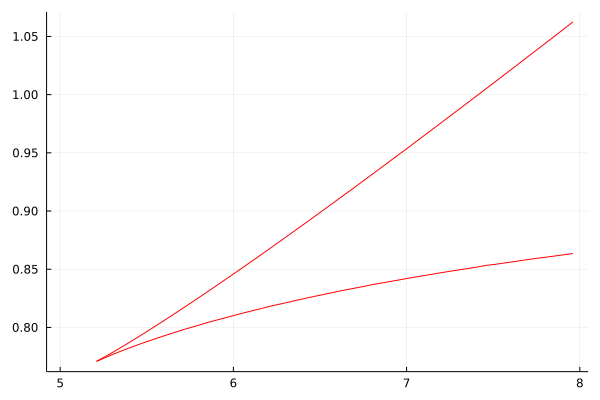

In [79]:
k = [8.01-0.05*n for n in 1:60]
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,k[1],0.6],(@lens _[3]), opts)
p1 = [br1.specialpoint[1].param]
p2 = [br1.specialpoint[2].param]
x1 = br1.specialpoint[1].x
x2 = br1.specialpoint[2].x
x = [br1.x]
p = [br1.param]
for n=2:60
    opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
    br1, = continuation(F,[6.5],[0.5,k[n],0.6],(@lens _[3]), opts)
    if length(br1.specialpoint)>0
        append!(p1,br1.specialpoint[1].param)
        append!(p2,br1.specialpoint[2].param)
        append!(x1,br1.specialpoint[1].x)
        append!(x2,br1.specialpoint[2].x)
    else    
        append!(p1,NaN)
        append!(p2,NaN)
        append!(x1,NaN)
        append!(x2,NaN)
    end
    append!(x,[br1.x])
    append!(p,[br1.param])
end
plot(k,p1,color=:red,legend=false)
plot!(k,p2,color=:red)

In [80]:
pl1=plot()
@manipulate throttle=0.05 for az=0:5:90, el=0:5:90
    for n=1:60
        N = length(x[n])
        plot!(pl1,k[n]*ones(N,),p[n],x[n],color=:gray,alpha=0.1,legend=false,camera = (az,el))
    end    
    plot!(pl1,k,p1,x1,color=:red,legend=false)
    plot!(pl1,k,p2,x2,color=:red,legend=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["az"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 19, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008141c4c0, Task (runnable) @0x000000008141c4c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"5\",\"10\",\"15\",\"20\",\"25\",\"30\",\"35\",\"40\",\"45\",\"50\",\"55\",\"60\",\"65\",\"70\",\"75\",\"80\",\"85\",\"90\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4438008287303399721\

In [ ]:
FJ = BifurcationKit.getJet(F; matrixfree=false)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(FJ[1],FJ[2],[6.5],[0.5,7.0,0.6],(@lens _[3]), opts; recordFromSolution = (x, p) -> (x = x[1]))
opts2 =  ContinuationPar(opts, pMin=5.0,pMax=7.0, ds = -0.001, dsmax = 0.04)
br2, = continuation(FJ[1:2]..., br1, 1, (@lens _[2]), opts2; detectCodim2Bifurcation=2,updateMinAugEveryStep = 1)
plot(br2)

## Cusp forma Normal

El sistema anterior resulta sumamente arduo de resolver analiticamente, vamos a tomar un ejemplo mas sencillo dependiente de dos parametros (aunque no tiene una aplicacion directa) que tambien experimenta dos bifurcaciones de nodos silla que se juntan en un punto cusp en el espacio de parametros. En realidad el ejemplo es la "formal normal" de esta bifurcacion aunque en el curso no entramos en el detalle de lo que son las formas normales (al menos de manera formal), asi que por ahora podemos tomarla como la forma mas simple o universal.

El sistema es:

$\dot{x} = \mu_1 + \mu_2 x - x^3$ 

Vamos a evitarnos la tarea de calcular los puntos fijos (que implica resolver la cubica como en el caso anterior) e interpretar el miembro derecho (campo vector) geometricamente. Si recordamos la forma de la cubica (sin termino cuadratico) cuando estudiamos los puntos fijos del oscilador de Duffing, podia ser tipo "N" o no dependiendo de is el signo de la parte lineal con respecto a la cubica. En este caso la diferencia es que $\mu_1$ suma como una constante. Si tenemos $\mu_2>0$ la cubica forma una "N" y podemos tener uno o tres puntos fijos dependiendo del valor de $\mu_1$ que sube o baja la curva con un valor constante:

In [ ]:
#ejemplo con mu2=1 y diferentes valores de mu1
x = -1.5:0.01:1.5
p1=plot(x,.5 .+x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .+x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .+x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Podemos anticipar que van a ocurrir dos bifurcaciones de nodo silla cuando se pase de 1 a 3 puntos fijos y viceversa. Si en cambio $\mu_2<0$ La cubica esta "estirada" hay siempre un punto fijo (atractor, la pendiente es negativa) y no hay bifurcaciones.

In [ ]:
# ahora con mu2=-1
p1=plot(x,.5 .-x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .-x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .-x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Por lo tanto podemos inferir que en algun punto las dos bifurcaciones de nodo silla van a tener que colisionar en un punto cusp. No es dificil ver en este caso que eso ocurre para $\mu_2=0$, $\mu_1=0$

Tampoco es dificil dibujar el diagrama de bifurcaciones. Vamos a dejar fijo $\mu_2$ por ahora y estudiar el diagrama de bifurcaciones en el plano ($\mu_1,x$) como haciamos con la bifurcaciones de codimension 1.

En ese caso recordemos que los puntos fijos corresponden con curvas que estan dadas de forma implicita por $f(x,\mu_1)=0$ donde $f$ es el miembro derecho de la ecuacion (el campo vector). En este caso es mucho mas facil despejar de forma explicita $\mu_1$ en funcion de $x$ (para un valor de  fijo).

$\mu_1(x) = x^3 - \mu_2 x$

que como antes si $\mu_2>0$ es una cubica con forma de "N" que se estira para el otro caso, pero acostada:

In [ ]:
x = -1:0.01:1
@manipulate for μ2=-1:0.01:1
    plot()
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!([-2*x0^3],[x0],color=:red)
        scatter!([2*x0^3],[-x0],color=:red)
    end   
    plot!(x.^3-μ2*x,x);plot!([-1,1],[0,0],xrange=(-0.5,0.5),legend=false)
end

Ademas podemos calcular para que valores de ($\mu_1,x$) ocurren las bifurcaciones de nodo silla (en el caso de $\mu_2>0$). Solo tenemos que encontrar cuando la derivada de $\mu_1$ con respecto a $x$ se hace cero y eso sucede cuando $3x^2 = \mu_2$ o sea para los puntos: 

$x=-\sqrt{\mu_2/3}$ ,  $\mu_1=2\left( \sqrt{\mu_2/3}\right)^3$

$x=\sqrt{\mu_2/3}$ ,  $\mu_1=-2\left( \sqrt{\mu_2/3} \right)^3$

esos puntos estan representados en el grafico interactivo de arriba

Vamos ahora a trazar el diagrama de bifurcaciones completo en el espacio de parametros ($\mu_1,\mu_2$). Las curvas que determinan la bifurcacion de nodo silla en este espacio corresponden a los dos puntos calculados anteriormente pero ahora expresados como $\mu_1$ en funcion de $\mu_2$ en el dominio $\mu_2>0$ 

$\mu_1= \pm 2\left( \sqrt{\mu_2/3}\right)^3$

In [ ]:
μ2list = 0:0.01:1
@manipulate throttle=.1 for μ2=-0.5:0.01:1
    p1 = plot(x.^3-μ2*x,x);plot!([-1,1],[0,0],xlims=(-0.5,0.5),legend=false)
    p2 = plot(-2*sqrt.(μ2list/3).^3,μ2list,xlims=(-0.5,0.5),legend=false,color=:red)
    p2 = plot!(2*sqrt.(μ2list/3).^3,μ2list,ylims=(-0.5,1),color=:red)
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!(p1,[-2*x0^3],[x0],color=:red)
        scatter!(p1,[2*x0^3],[-x0],color=:red)
        scatter!(p2,[-2*x0^3],[μ2],color=:red)
        scatter!(p2,[2*x0^3],[μ2],color=:red)
    else
        scatter!(p2,[0],[μ2],color=:gray)
    end   
    plot(p1,p2,layout=(2,1),size=(400,500))
end

# Bifurcacion Takens-Bogdanov (codimension 2)

Las bifurcaciones (de codimension 1) que vimos hasta ahora se pueden caracterizar en dos grupos:

- Las que suceden cuando un autovalor real se hace cero. Tenemos de forma generica una bifurcacion de nodo silla, pero tambien una pitchfork o una transcritica si se dan otras condiciones de simetria.
- La que sucede cuando la parte real de dos autovalores complejos conjugados se hace cero. En ese caso tenemos una bifurcacion de Hopf.

Claramente el primer caso puede suceder en un sistema 1D (o uno de mayor dimension a lo largo de una direccion particular), mientras que el segundo necesitamos al menos un sistema 2D para tener dos autovalores, pero hace falta solo un parametro para controlarla (para mover la parte real). 

Pero si estamos en un sistema 2D, no podria suceder que **ambos** autovalores se hagan cero de forma simultanea? Claramente si vemos la expresion de los autovalores vamos a necesitar al menos dos parametros para ajustar este punto. Por otra parte que dos autovalores crucen el cero por el eje real seria algo asi como dos nodo-silla sucediendo al mismo tiempo, pero tambien podria verse como una bifurcacion de Hopf con parte imaginaria cero. Es decir este tipo de bifurcacion "degenerada" tiene adentro al menos dos nodo silla (como la cusp) y una Hopf. 

Esta bifurcacion de codimension 2 se conoce como doble cero o Bogdanov-Takens (o Takens-Bogdanov). La forma normal  esta caracterizada por tener el siguiente Jacobiano:

$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
$

el cual "induce" que aparezcan los siguientes terminos no lineales (en la version de Bogdanov):

$\dot{x} = y$

$\dot{y} = x^2-xy$

Notar que todavia no introdujimos ningun parametro, esto es la singularidad "pura". Para extender esto en el espacio de parametros (o de sistemas dinamicos para ser mas preciso) es necesario hacer un **unfolding**, y aca hay varias posibilidades, vamos tomar la que hace Guckenheimer & Holmes:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy$

Vamos a estudiar directamente las bifurcaciones sin preocuparnos todavia por las soluciones porque este sistema (al igual del nodo silla en el plano) tiene trayectorias divergentes.

Como tenemos terminos hasta orden cuadratico vamos a poder tener de forma generica dos puntos fijos o ninguno. Siempre ubicados en el eje horizontal $y=0$ y con la coordenada $x$ en:

$x_{\pm}=-\frac{\mu_2}{2}\pm \sqrt{\frac{\mu_2^2}{4}-\mu_1}$

El signo positivo corresponde al punto fijo de la derecha y el negativo al de la izquierda (cuando estos existan).

la condicion para existencia de los puntos fijos es que el interior de la raiz sea positivo lo cual nos da una condicion para trazar una curva de bifurcacion nodos silla en el plano $(\mu_1,\mu_2)$:

SN : $\mu_1=\frac{\mu_2^2}{4}$

Por otra parte el Jacobiano evaluado en los puntos fijos (conservando el orden $\pm$) queda escrito 

$
\begin{pmatrix}
0 & 1\\
\pm 2\sqrt{\frac{\mu_2^2}{4}-\mu_1} & \frac{\mu_2}{2}\mp \sqrt{\frac{\mu_2^2}{4}-\mu_1}
\end{pmatrix}
$

Lo cual nos da el determinante:

$\Delta = \mp 2\sqrt{\frac{\mu_2^2}{4}-\mu_1}$

que para el punto fijo de la derecha es siempre negativo (punto silla) y para el de la izquierda positivo. Para este ultimo evaluamos la traza (solo conservamos el signo de abajo):

$\tau = \frac{\mu_2}{2}+\sqrt{\frac{\mu_2^2}{4}-\mu_1} $

como la raiz es positiva cuando $\mu_2<0$, la traza se va a hacer cero cuando $\mu_1=0$. Esto nos da la condicion para trazar la curva de la bifurcacion de Hopf  en el plano $(\mu_1,\mu_2)$:

Hopf: $\mu_2>0$  , $\mu_1=0$

Esta curva se junta con la parabola SN en el punto $(0,0)$ asi que tal como habiamos anticipado en este punto singular tenemos una curva SN y una Hopf ocurriendo simultaneamente. El diagrama de bifurcaciones completo (tomado de la Scholarpedia) es:

<div>
<img src="../files/BogdanovTakens.gif" width="500px">
</div>


Notar que hay una curva adicional (en rojo) que corresponde a una bifurcacion global (conexion homoclinica). No vamnos a estudiar bifurcaciones globales pero podemos decir que las mas comunes ocurren cuando las variedades estables e inestables de diferentes puntos silla se conectan entre si (conexion heteroclinica) o en el mismo punto silla como en este caso (conexion homoclinica). Explorar las como se modifican las variedades en el grafico de abajo y tratar de localizar cuando se produce la conexion homoclinica. Como guia se muestra a la derecha el diagrama de bifurcaciones con las curvas SN y Hopf analiticas y en linea punteada la homclinica que ocurre (no vamos a mostrar la deduccion de eso) cuando:

HC: $\mu_1 = -\frac{6}{25}\mu_2^2$ ,  $\mu_2<0$


In [ ]:
function takens!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+p[2]*u[1]+u[1]*u[1]-u[1]*u[2]
    du
end    

In [ ]:
function takens_jac(u,p) 
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = p[2]+2*u[1]-u[2]
  J[2,2] = -u[1]
  return J
end

In [ ]:
@manipulate throttle=0.5 for μ1=-1:0.005:1,μ2=-1:0.005:1
    if μ1 < μ2^2/4
        u0_array=[[-μ2/2-sqrt(μ2^2/4-μ1);0],[-μ2/2+sqrt(μ2^2/4-μ1);0]]
        p1=plot_manifolds(takens!,takens_jac,u0_array,[μ1,μ2];tmax=100,delta=1e-6,xlims=[-1.5,1.5],ylims=[-1,1],size=(400,400))
    else 
        p1=plot()
    end 
    p2 = plot(0.25*(-1:0.01:1).^2,-1:0.01:1,color=:blue,legend=false)
    plot!(p2,-6/25*(-1:0.01:0).^2,-1:0.01:0,color=:red,legend=false)
    plot!(p2,[0,0],[-1,0.0],color=:green)
    scatter!(p2,[μ1],[μ2],xlims=(-0.5,0.5))
    plot(p1,p2,layout=(1,2),size=(900,400))
end    

Si bien en este caso pudimos calcular las curvas de bifurcacion de forma analitica (al menos SN y Hopf) Vamos a usar BifurcationToolkit para seguir las curvas de bifurcacion. Empezamos con la mas facil que es la SN



In [ ]:
takens(u,p) = takens!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.28, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens,(z,p) -> ForwardDiff.jacobian(x -> takens(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-1.0],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
plot(br1)

In [ ]:
SN, = continuation(FJ[1],FJ[2],br1,2,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=1.0); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

In [ ]:
H, = continuation(FJ[1],FJ[2],br1,1,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
plot(SN,branchlabel="SN")
plot!(H,branchlabel="Hopf")

## Bogdanov Takens con terminos cubicos

Como puede verse la bifurcacion BT presenta una dinamica muy interesante y variada, con minimas alteraciones en los parametros se puede pasar de comportamientos oscilatorios, creacion de pares de puntos fijos y orbitas de periodo infinito (conexiones HC). El problma del sistema anterior es que tiene trayectorias divergentes, por lo cual necesitamos agregar terminos de orden mas alto (que no van a alterar la bifurcacion de BT aunque si pueden cambiar el diagrama de bifurcaciones fuera de ese punto) que aseguren que las trayectorias no diverjan. De vuelta hay varias alternativas, vamos a seguir la que propone Mindlin:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy - x^3 -x^2y$ 

En este caso al tener terminos cubicos vamos a tener de forma general uno o tres puntos fijos, como en el caso de la cusp los puntos fijos pasan de ser 1 a 3 a traves de bifurcaciones de nodo silla que ocurren en pares de puntos distintos. De hecho los terminos cubicos lo que hacen es introducir una cusp ademas de la Bogadanov-Takens.

Vamos a ver como se organizan las variedades a partir 

In [112]:
function takens3!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(p[2]-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

takens3! (generic function with 1 method)

In [113]:
@manipulate throttle=0.1 for μ1=-0.15:0.001:0.1,μ2=-0.4:0.001:0.1
    phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-1,1],ylims=[-0.5,0.5])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 251, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
126, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000012051f50, Task (runnable) @0x0000000012051f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.15\",\"-0.149\",\"-0.148\",\"-0.147\",\"-0.146\",\"-0.145\",\"-0.144\",\"-0.143\",\"-0.142\",\"-0.141\",\"-0.14\",\"-0.139\",\"-0.138\",\"-0.137\",\"-0.136\",\"-0.135\",\"-0.134\",\"-0.133\",\"-0.132\",\"

[:hopf, :bp, :bp]

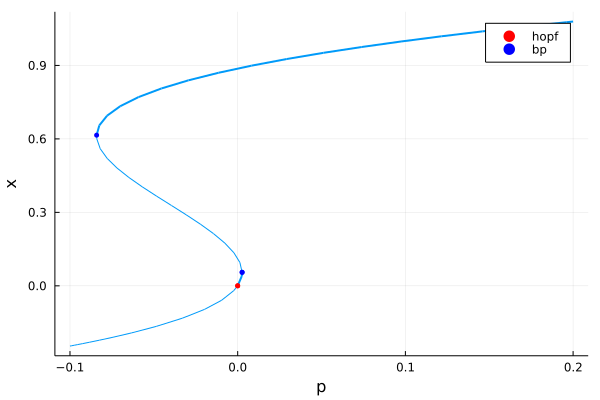

In [114]:
takens3(u,p) = takens3!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.2, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens3,(z,p) -> ForwardDiff.jacobian(x -> takens3(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.1],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
print([pt.type for pt in br1.specialpoint])
plot(br1)

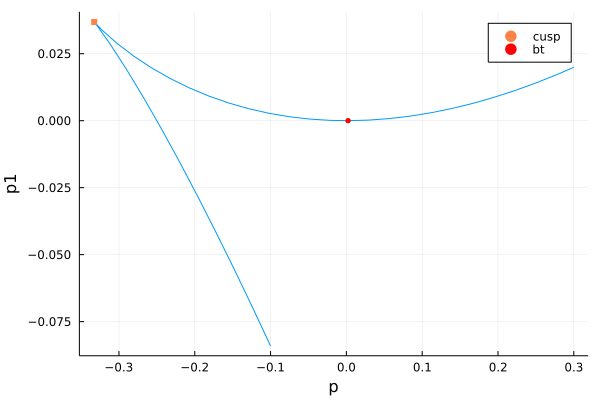

In [115]:
SN, = continuation(FJ[1],FJ[2],br1,3,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.3,ds=-0.001); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

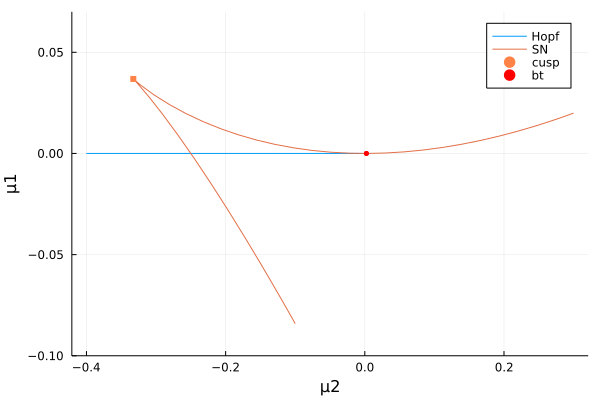

In [116]:
br2, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.4],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
H, = continuation(FJ[1],FJ[2],br2,1,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))

In [118]:
@manipulate throttle=0.1 for μ1=-0.25:0.001:0.1,μ2=-0.4:0.001:0.1
    p2=phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-0.7,0.7],ylims=[-0.5,0.5])
    p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
    plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))
    scatter!(p1,[μ2],[μ1],label=false)
    plot(p1,p2,layout=(1,2),size=(900,400))
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 351, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
176, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000112eeef0, Task (runnable) @0x00000000112eeef0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.25\",\"-0.249\",\"-0.248\",\"-0.247\",\"-0.246\",\"-0.245\",\"-0.244\",\"-0.243\",\"-0.242\",\"-0.241\",\"-0.24\",\"-0.239\",\"-0.238\",\"-0.237\",\"-0.236\",\"-0.235\",\"-0.234\",\"-0.233\",\"-0.232\",\"

In [119]:
4/27

0.14814814814814814